Import Libary

In [2]:
import pandas as pd 

import nltk

import matplotlib.pyplot as plt
import seaborn as sns

### **Model Development**

In [3]:
data = pd.read_csv('data/mentri.csv')

Train Test Split

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=8000)
X_tfidf = tfidf.fit_transform(data['clean_teks'])
y = data['sentiment']

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_tfidf, y)

# Check label counts after SMOTE
print("Label counts after SMOTE:")
print(pd.Series(y_smote).value_counts())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Print shapes of the train and test sets
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Label counts after SMOTE:
sentiment
negative    1381
positive    1381
Name: count, dtype: int64
Train set shape: (2209, 4750), (2209,)
Test set shape: (553, 4750), (553,)


# Poliynomial

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the SVM model with polynomial kernel
svm_model = SVC(kernel='poly')  # Set the kernel explicitly to 'poly'

# Define the parameter grid for advanced hyperparameter tuning for polynomial kernel
svm_params = {
    'C': uniform(0.1, 100),  # Uniform distribution between 0.1 and 100
    'degree': [2, 3, 4, 5, 6, 7, 8, 10],  # Polynomial degree options
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],  # Range of gamma values
    'coef0': [0.0, 0.1, 0.5, 1.0, 2.0, 3.0],  # Range for coef0
    'class_weight': [None, 'balanced'],  # Class weight options
    'shrinking': [True, False],  # Shrinking heuristic
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
    'max_iter': [1000, 2000, 3000, 4000, 5000]  # Maximum number of iterations
}

# Perform RandomizedSearchCV
svm_random = RandomizedSearchCV(svm_model, svm_params, n_iter=50, cv=15, scoring='accuracy', random_state=42, n_jobs=-1)
svm_random.fit(X_train, y_train)

# Get the best estimator and predictions for test data
svm_best = svm_random.best_estimator_
svm_pred_test_poly = svm_best.predict(X_test)

# Calculate metrics for test data
accuracy_svm_test_poly = accuracy_score(y_test, svm_pred_test_poly)
precision_svm_test_poly = precision_score(y_test, svm_pred_test_poly, average='weighted')
recall_svm_test_poly = recall_score(y_test, svm_pred_test_poly, average='weighted')
f1_svm_test_poly = f1_score(y_test, svm_pred_test_poly, average='weighted')

# Get the best estimator and predictions for training data
svm_pred_train_poly = svm_best.predict(X_train)

# Calculate metrics for training data
accuracy_svm_train_poly = accuracy_score(y_train, svm_pred_train_poly)
precision_svm_train_poly = precision_score(y_train, svm_pred_train_poly, average='weighted')
recall_svm_train_poly = recall_score(y_train, svm_pred_train_poly, average='weighted')
f1_svm_train_poly = f1_score(y_train, svm_pred_train_poly, average='weighted')

# Display the best parameters and classification report for test data
svm_best_params = svm_random.best_params_
svm_best_score = svm_random.best_score_

print(f"Best Parameters: {svm_best_params}")
print(f"Best Cross-Validation Accuracy: {svm_best_score}\n")

# Display the metrics for test data
print(f"SVM Test (Poly) - Accuracy: {accuracy_svm_test_poly}")
print(f"SVM Test (Poly) - Precision: {precision_svm_test_poly}")
print(f"SVM Test (Poly) - Recall: {recall_svm_test_poly}")
print(f"SVM Test (Poly) - F1 Score: {f1_svm_test_poly}")

# Display the metrics for training data
print(f"\nSVM Train (Poly) - Accuracy: {accuracy_svm_train_poly}")
print(f"SVM Train (Poly) - Precision: {precision_svm_train_poly}")
print(f"SVM Train (Poly) - Recall: {recall_svm_train_poly}")
print(f"SVM Train (Poly) - F1 Score: {f1_svm_train_poly}")

# Generate classification report for test data
class_report_test_poly = classification_report(y_test, svm_pred_test_poly, target_names=['negative', 'positive'])
print("\nClassification Report (Test Data - Poly Kernel):\n")
print(class_report_test_poly)

c:\Users\alfar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Parameters: {'C': 61.848150962771655, 'class_weight': 'balanced', 'coef0': 3.0, 'degree': 6, 'gamma': 0.01, 'max_iter': 1000, 'shrinking': True, 'tol': 1e-05}
Best Cross-Validation Accuracy: 0.9778298706870135

SVM Test (Poly) - Accuracy: 0.9855334538878843
SVM Test (Poly) - Precision: 0.9857694634054683
SVM Test (Poly) - Recall: 0.9855334538878843
SVM Test (Poly) - F1 Score: 0.9855354410508117

SVM Train (Poly) - Accuracy: 1.0
SVM Train (Poly) - Precision: 1.0
SVM Train (Poly) - Recall: 1.0
SVM Train (Poly) - F1 Score: 1.0

Classification Report (Test Data - Poly Kernel):

              precision    recall  f1-score   support

    negative       0.97      1.00      0.99       270
    positive       1.00      0.98      0.99       283

    accuracy                           0.99       553
   macro avg       0.99      0.99      0.99       553
weighted avg       0.99      0.99      0.99       553



# RBF

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the SVM model with polynomial kernel
svm_model = SVC(kernel='rbf')  # Set the kernel explicitly to 'rbf'

# Define the parameter grid for advanced hyperparameter tuning for polynomial kernel
svm_params = {
    'C': uniform(0.1, 100),  # Uniform distribution between 0.1 and 100
    'degree': [2, 3, 4, 5, 6, 7, 8, 10],  # Polynomial degree options
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],  # Range of gamma values
    'coef0': [0.0, 0.1, 0.5, 1.0, 2.0, 3.0],  # Range for coef0
    'class_weight': [None, 'balanced'],  # Class weight options
    'shrinking': [True, False],  # Shrinking heuristic
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
    'max_iter': [1000, 2000, 3000, 4000, 5000]  # Maximum number of iterations
}

# Perform RandomizedSearchCV
svm_random = RandomizedSearchCV(svm_model, svm_params, n_iter=50, cv=15, scoring='accuracy', random_state=42, n_jobs=-1)
svm_random.fit(X_train, y_train)

# Get the best estimator and predictions for test data
svm_best = svm_random.best_estimator_
svm_pred_test_rbf = svm_best.predict(X_test)

# Calculate metrics for test data
accuracy_svm_test_rbf = accuracy_score(y_test, svm_pred_test_rbf)
precision_svm_test_rbf = precision_score(y_test, svm_pred_test_rbf, average='weighted')
recall_svm_test_rbf = recall_score(y_test, svm_pred_test_rbf, average='weighted')
f1_svm_test_rbf = f1_score(y_test, svm_pred_test_rbf, average='weighted')

# Get the best estimator and predictions for training data
svm_pred_train_rbf = svm_best.predict(X_train)

# Calculate metrics for training data
accuracy_svm_train_rbf = accuracy_score(y_train, svm_pred_train_rbf)
precision_svm_train_rbf = precision_score(y_train, svm_pred_train_rbf, average='weighted')
recall_svm_train_rbf = recall_score(y_train, svm_pred_train_rbf, average='weighted')
f1_svm_train_rbf = f1_score(y_train, svm_pred_train_rbf, average='weighted')

# Display the best parameters and classification report for test data
svm_best_params = svm_random.best_params_
svm_best_score = svm_random.best_score_

print(f"Best Parameters: {svm_best_params}")
print(f"Best Cross-Validation Accuracy: {svm_best_score}\n")

# Display the metrics for test data
print(f"SVM Test (rbf) - Accuracy: {accuracy_svm_test_rbf}")
print(f"SVM Test (rbf) - Precision: {precision_svm_test_rbf}")
print(f"SVM Test (rbf) - Recall: {recall_svm_test_rbf}")
print(f"SVM Test (rbf) - F1 Score: {f1_svm_test_rbf}")

# Display the metrics for training data
print(f"\nSVM Train (rbf) - Accuracy: {accuracy_svm_train_rbf}")
print(f"SVM Train (rbf) - Precision: {precision_svm_train_rbf}")
print(f"SVM Train (rbf) - Recall: {recall_svm_train_rbf}")
print(f"SVM Train (rbf) - F1 Score: {f1_svm_train_rbf}")

# Generate classification report for test data
class_report_test_rbf = classification_report(y_test, svm_pred_test_rbf, target_names=['negative', 'positive'])
print("\nClassification Report (Test Data - rbf Kernel):\n")
print(class_report_test_rbf)

c:\Users\alfar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Parameters: {'C': 15.171754396542946, 'class_weight': None, 'coef0': 3.0, 'degree': 10, 'gamma': 0.1, 'max_iter': 3000, 'shrinking': False, 'tol': 1e-05}
Best Cross-Validation Accuracy: 0.9751179751179752

SVM Test (rbf) - Accuracy: 0.9837251356238698
SVM Test (rbf) - Precision: 0.9840448530671634
SVM Test (rbf) - Recall: 0.9837251356238698
SVM Test (rbf) - F1 Score: 0.9837273710871182

SVM Train (rbf) - Accuracy: 0.9995473064735174
SVM Train (rbf) - Precision: 0.9995477135720124
SVM Train (rbf) - Recall: 0.9995473064735174
SVM Train (rbf) - F1 Score: 0.9995473051746695

Classification Report (Test Data - rbf Kernel):

              precision    recall  f1-score   support

    negative       0.97      1.00      0.98       270
    positive       1.00      0.97      0.98       283

    accuracy                           0.98       553
   macro avg       0.98      0.98      0.98       553
weighted avg       0.98      0.98      0.98       553



# Sigmoid

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the SVM model with polynomial kernel
svm_model = SVC(kernel='sigmoid')  # Set the kernel explicitly to 'sigmoid'

# Define the parameter grid for advanced hyperparameter tuning for polynomial kernel
svm_params = {
    'C': uniform(0.1, 100),  # Uniform distribution between 0.1 and 100
    'degree': [2, 3, 4, 5, 6, 7, 8, 10],  # Polynomial degree options
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],  # Range of gamma values
    'coef0': [0.0, 0.1, 0.5, 1.0, 2.0, 3.0],  # Range for coef0
    'class_weight': [None, 'balanced'],  # Class weight options
    'shrinking': [True, False],  # Shrinking heuristic
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
    'max_iter': [1000, 2000, 3000, 4000, 5000]  # Maximum number of iterations
}

# Perform RandomizedSearchCV
svm_random = RandomizedSearchCV(svm_model, svm_params, n_iter=50, cv=15, scoring='accuracy', random_state=42, n_jobs=-1)
svm_random.fit(X_train, y_train)

# Get the best estimator and predictions for test data
svm_best = svm_random.best_estimator_
svm_pred_test_sigmoid = svm_best.predict(X_test)

# Calculate metrics for test data
accuracy_svm_test_sigmoid = accuracy_score(y_test, svm_pred_test_sigmoid)
precision_svm_test_sigmoid = precision_score(y_test, svm_pred_test_sigmoid, average='weighted')
recall_svm_test_sigmoid = recall_score(y_test, svm_pred_test_sigmoid, average='weighted')
f1_svm_test_sigmoid = f1_score(y_test, svm_pred_test_sigmoid, average='weighted')

# Get the best estimator and predictions for training data
svm_pred_train_sigmoid = svm_best.predict(X_train)

# Calculate metrics for training data
accuracy_svm_train_sigmoid = accuracy_score(y_train, svm_pred_train_sigmoid)
precision_svm_train_sigmoid = precision_score(y_train, svm_pred_train_sigmoid, average='weighted')
recall_svm_train_sigmoid = recall_score(y_train, svm_pred_train_sigmoid, average='weighted')
f1_svm_train_sigmoid = f1_score(y_train, svm_pred_train_sigmoid, average='weighted')

# Display the best parameters and classification report for test data
svm_best_params = svm_random.best_params_
svm_best_score = svm_random.best_score_

print(f"Best Parameters: {svm_best_params}")
print(f"Best Cross-Validation Accuracy: {svm_best_score}\n")

# Display the metrics for test data
print(f"SVM Test (sigmoid) - Accuracy: {accuracy_svm_test_sigmoid}")
print(f"SVM Test (sigmoid) - Precision: {precision_svm_test_sigmoid}")
print(f"SVM Test (sigmoid) - Recall: {recall_svm_test_sigmoid}")
print(f"SVM Test (sigmoid) - F1 Score: {f1_svm_test_sigmoid}")

# Display the metrics for training data
print(f"\nSVM Train (sigmoid) - Accuracy: {accuracy_svm_train_sigmoid}")
print(f"SVM Train (sigmoid) - Precision: {precision_svm_train_sigmoid}")
print(f"SVM Train (sigmoid) - Recall: {recall_svm_train_sigmoid}")
print(f"SVM Train (sigmoid) - F1 Score: {f1_svm_train_sigmoid}")

# Generate classification report for test data
class_report_test_sigmoid = classification_report(y_test, svm_pred_test_sigmoid, target_names=['negative', 'positive'])
print("\nClassification Report (Test Data - rbf Kernel):\n")
print(class_report_test_sigmoid)

c:\Users\alfar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Parameters: {'C': 37.55401188473625, 'class_weight': None, 'coef0': 0.5, 'degree': 10, 'gamma': 0.1, 'max_iter': 5000, 'shrinking': True, 'tol': 0.0001}
Best Cross-Validation Accuracy: 0.9764662621805478

SVM Test (sigmoid) - Accuracy: 0.9873417721518988
SVM Test (sigmoid) - Precision: 0.9875065195254614
SVM Test (sigmoid) - Recall: 0.9873417721518988
SVM Test (sigmoid) - F1 Score: 0.9873434282022476

SVM Train (sigmoid) - Accuracy: 0.9995473064735174
SVM Train (sigmoid) - Precision: 0.9995477135720124
SVM Train (sigmoid) - Recall: 0.9995473064735174
SVM Train (sigmoid) - F1 Score: 0.9995473051746695

Classification Report (Test Data - rbf Kernel):

              precision    recall  f1-score   support

    negative       0.98      1.00      0.99       270
    positive       1.00      0.98      0.99       283

    accuracy                           0.99       553
   macro avg       0.99      0.99      0.99       553
weighted avg       0.99      0.99      0.99       553



# Linear

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the SVM model with polynomial kernel
svm_model = SVC(kernel='linear')  # Set the kernel explicitly to 'linear'

# Define the parameter grid for advanced hyperparameter tuning for polynomial kernel
svm_params = {
    'C': uniform(0.1, 100),  # Uniform distribution between 0.1 and 100
    'degree': [2, 3, 4, 5, 6, 7, 8, 10],  # Polynomial degree options
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],  # Range of gamma values
    'coef0': [0.0, 0.1, 0.5, 1.0, 2.0, 3.0],  # Range for coef0
    'class_weight': [None, 'balanced'],  # Class weight options
    'shrinking': [True, False],  # Shrinking heuristic
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
    'max_iter': [1000, 2000, 3000, 4000, 5000]  # Maximum number of iterations
}

# Perform RandomizedSearchCV
svm_random = RandomizedSearchCV(svm_model, svm_params, n_iter=50, cv=15, scoring='accuracy', random_state=42, n_jobs=-1)
svm_random.fit(X_train, y_train)

# Get the best estimator and predictions for test data
svm_best = svm_random.best_estimator_
svm_pred_test_linear = svm_best.predict(X_test)

# Calculate metrics for test data
accuracy_svm_test_linear = accuracy_score(y_test, svm_pred_test_linear)
precision_svm_test_linear = precision_score(y_test, svm_pred_test_linear, average='weighted')
recall_svm_test_linear = recall_score(y_test, svm_pred_test_linear, average='weighted')
f1_svm_test_linear = f1_score(y_test, svm_pred_test_linear, average='weighted')

# Get the best estimator and predictions for training data
svm_pred_train_linear = svm_best.predict(X_train)

# Calculate metrics for training data
accuracy_svm_train_linear = accuracy_score(y_train, svm_pred_train_linear)
precision_svm_train_linear = precision_score(y_train, svm_pred_train_linear, average='weighted')
recall_svm_train_linear = recall_score(y_train, svm_pred_train_linear, average='weighted')
f1_svm_train_linear = f1_score(y_train, svm_pred_train_linear, average='weighted')

# Display the best parameters and classification report for test data
svm_best_params = svm_random.best_params_
svm_best_score = svm_random.best_score_

print(f"Best Parameters: {svm_best_params}")
print(f"Best Cross-Validation Accuracy: {svm_best_score}\n")

# Display the metrics for test data
print(f"SVM Test (sigmoid) - Accuracy: {accuracy_svm_test_linear}")
print(f"SVM Test (sigmoid) - Precision: {precision_svm_test_linear}")
print(f"SVM Test (sigmoid) - Recall: {recall_svm_test_linear}")
print(f"SVM Test (sigmoid) - F1 Score: {f1_svm_test_linear}")

# Display the metrics for training data
print(f"\nSVM Train (sigmoid) - Accuracy: {accuracy_svm_train_linear}")
print(f"SVM Train (sigmoid) - Precision: {precision_svm_train_linear}")
print(f"SVM Train (sigmoid) - Recall: {recall_svm_train_linear}")
print(f"SVM Train (sigmoid) - F1 Score: {f1_svm_train_linear}")

# Generate classification report for test data
class_report_test_linear = classification_report(y_test, svm_pred_test_linear, target_names=['negative', 'positive'])
print("\nClassification Report (Test Data - rbf Kernel):\n")
print(class_report_test_linear)

Best Parameters: {'C': 37.55401188473625, 'class_weight': None, 'coef0': 0.5, 'degree': 10, 'gamma': 0.1, 'max_iter': 5000, 'shrinking': True, 'tol': 0.0001}
Best Cross-Validation Accuracy: 0.9778298706870135

SVM Test (sigmoid) - Accuracy: 0.9855334538878843
SVM Test (sigmoid) - Precision: 0.9857694634054683
SVM Test (sigmoid) - Recall: 0.9855334538878843
SVM Test (sigmoid) - F1 Score: 0.9855354410508117

SVM Train (sigmoid) - Accuracy: 1.0
SVM Train (sigmoid) - Precision: 1.0
SVM Train (sigmoid) - Recall: 1.0
SVM Train (sigmoid) - F1 Score: 1.0

Classification Report (Test Data - rbf Kernel):

              precision    recall  f1-score   support

    negative       0.97      1.00      0.99       270
    positive       1.00      0.98      0.99       283

    accuracy                           0.99       553
   macro avg       0.99      0.99      0.99       553
weighted avg       0.99      0.99      0.99       553



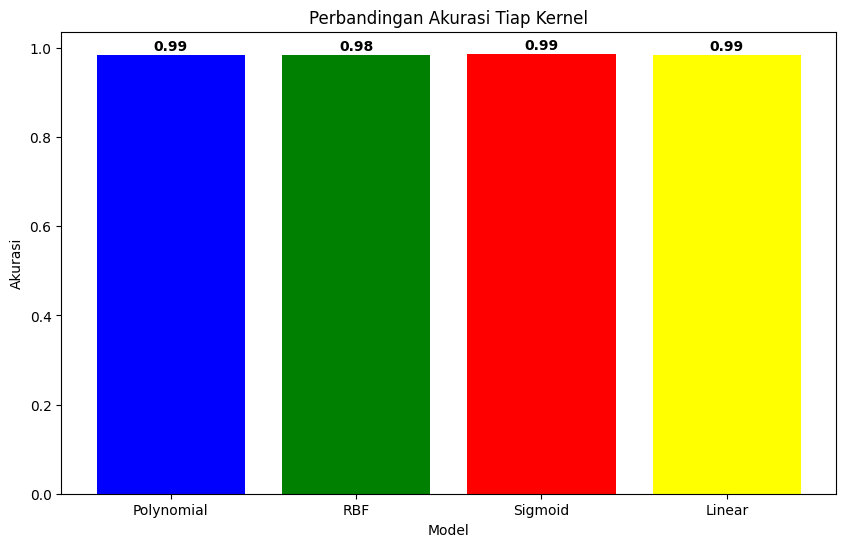

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# ----> Calculate and store the accuracy scores <----
accuracy_poly = accuracy_score(y_test, svm_pred_test_poly)
accuracy_rbf = accuracy_score(y_test, svm_pred_test_rbf)
accuracy_sigmoid = accuracy_score(y_test, svm_pred_test_sigmoid)
accuracy_linear = accuracy_score(y_test, svm_pred_test_linear)

# Akurasi model yang sudah dihitung sebelumnya
models = ['Polynomial', 'RBF', 'Sigmoid', 'Linear']
accuracies = [accuracy_poly, accuracy_rbf, accuracy_sigmoid, accuracy_linear]

# Membuat grafik bar
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'yellow'])

# Menambahkan label dan judul
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Tiap Kernel')

# Menampilkan nilai akurasi di atas batang
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, round(acc, 2), ha='center', color='black', fontweight='bold')

# Menampilkan grafik
plt.show()

In [11]:
print(f"SVM Test (Poly) - Accuracy: {accuracy_svm_test_poly}")
print(f"SVM Test (Rbf) - Accuracy: {accuracy_svm_test_rbf}")
print(f"SVM Test (Sigmoid) - Accuracy: {accuracy_svm_test_sigmoid}")
print(f"SVM Test (Linear) - Accuracy: {accuracy_svm_test_linear}")

SVM Test (Poly) - Accuracy: 0.9855334538878843
SVM Test (Rbf) - Accuracy: 0.9837251356238698
SVM Test (Sigmoid) - Accuracy: 0.9873417721518988
SVM Test (Linear) - Accuracy: 0.9855334538878843


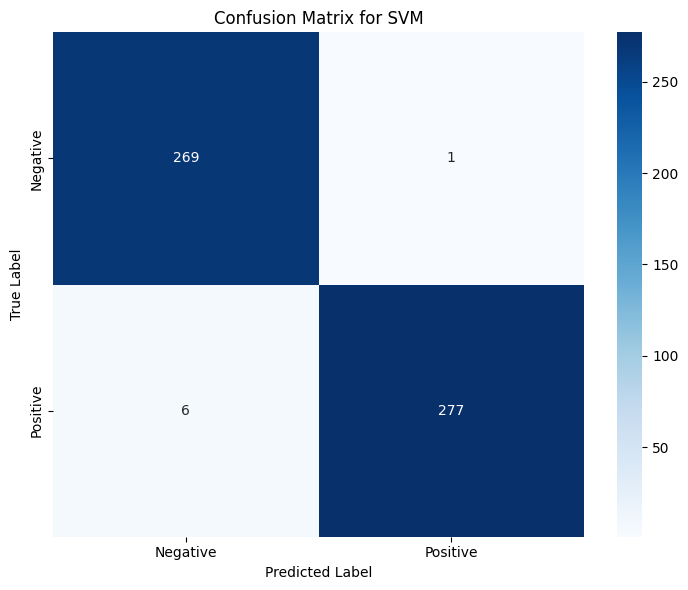

In [10]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrices
conf_matrix_svm = confusion_matrix(y_test, svm_pred_test_sigmoid)

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the confusion matrix for SVM
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix for SVM')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

fig.delaxes(axes[1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Set the display options to widen the view
pd.set_option('display.max_colwidth', None)  # Allow columns to be displayed fully without truncation
pd.set_option('display.width', 1000)  # Increase the display width
pd.set_option('display.expand_frame_repr', False)  # Avoid wrapping the DataFrame

# Prediksi menggunakan model SVM
svm_pred_test_sigmoid = svm_best.predict(X_test)  # Gunakan model yang sudah dilatih (svm_best)

# Reset index pada y_test setelah split
y_test = y_test.reset_index(drop=True)

# Identifikasi kesalahan klasifikasi untuk SVM
df_salah_klasifikasi_svm = pd.DataFrame({
    'Kalimat': data.loc[y_test.index, 'clean_teks'],
    'Label Asli': y_test,
    'Prediksi SVM': svm_pred_test_sigmoid
})

# Filter the rows where the predicted label is different from the true label
df_salah_klasifikasi_svm = df_salah_klasifikasi_svm[df_salah_klasifikasi_svm['Label Asli'] != df_salah_klasifikasi_svm['Prediksi SVM']]

# Tampilkan kalimat yang salah klasifikasi oleh SVM
print("\nKalimat yang salah klasifikasi oleh SVM:")
print(df_salah_klasifikasi_svm[['Kalimat', 'Label Asli', 'Prediksi SVM']])


Kalimat yang salah klasifikasi oleh SVM:
                                                                                                                                                                                                                    Kalimat Label Asli Prediksi SVM
98                                                                                                                                             presiden prabowo subianto umum susun kabinet merah putih mentri wakil mentri   positive     negative
110                                                                                                                                                                      erick thohir sosok mentri kaya kabinet merah putih   negative     positive
191                                                                                                                                 prabowogibranmerakyat prabowo gibran kabinet merah putih tolak provokasi tani sejahtera   posi